**Data Exploration**

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data**

In [2]:
df=pd.read_csv('AdSmartABdata.csv')
df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


**Establishing the number of rows and columns in the dataset**

In [3]:
# number of rows and columns
print(df.shape)

(8077, 9)


**List of all columns of the data**

In [4]:
# list of columns
df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

**Checking for the Missing Values**

In [5]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

**Finding the number of users that belong to control and exposed groups**

In [6]:
counts = df['experiment'].value_counts()
counts

control    4071
exposed    4006
Name: experiment, dtype: int64

**List of the days that data was collected with the number of users that saw the ad**

In [7]:
counts = df['date'].value_counts()
counts

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

**The hour of the day when the users interacted with the ad**

In [8]:
counts = df['hour'].value_counts()
counts

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

**The device that were used by the users**

In [9]:
counts = df['device_make'].value_counts()
counts

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
Samsung SM-G850F         1
Samsung SM-G950U1        1
Samsung SM-G960U1        1
6039Y                    1
Samsung SM-J810F         1
Name: device_make, Length: 270, dtype: int64

**The platform operating system used by the online users**

In [10]:
counts = df['platform_os'].value_counts()
counts

6    7648
5     428
7       1
Name: platform_os, dtype: int64

**Finding the browsers used by the online users**

In [11]:
counts = df['browser'].value_counts()
counts

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Opera Mobile                     3
Chrome                           3
Pinterest                        3
Edge Mobile                      1
Android                          1
Puffin                           1
Firefox Mobile                   1
Opera Mini                       1
Name: browser, dtype: int64

**Finding total number users that clicked 'yes' and 'no' for both control and exposed**

In [12]:
pd.crosstab(df['experiment'], df['yes'])

yes,0,1
experiment,,
control,3807,264
exposed,3698,308


In [13]:
pd.crosstab(df['experiment'], df['no'])

no,0,1
experiment,,
control,3749,322
exposed,3657,349


In [14]:
import scipy.stats as stats

conversion_rates = df.groupby('experiment')['yes']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.065,0.246,0.004
exposed,0.077,0.266,0.004


In [15]:
conversion_rates = df.groupby('experiment')['no']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.079,0.270,0.004
exposed,0.087,0.282,0.004


**DATA VISUALIZATION**

**Plot for experiment with 'yes'**


<AxesSubplot:xlabel='experiment', ylabel='yes'>

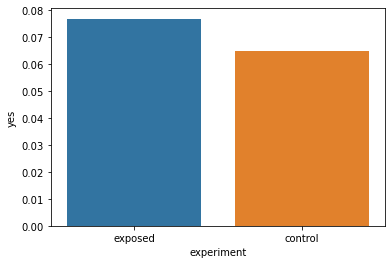

In [16]:
sns.barplot(x=df['experiment'], y=df['yes'], ci=False)

**Plot for experiment with 'no'**

<AxesSubplot:xlabel='experiment', ylabel='no'>

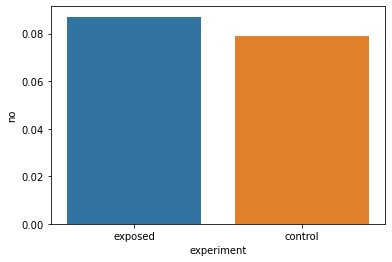

In [17]:
sns.barplot(x=df['experiment'], y=df['no'], ci=False)

**Plot for the experiment and the hour of the day**

In [18]:
df['date'] = pd.to_datetime(df['date'])

df['day of week'] = df['date'].dt.day_name()

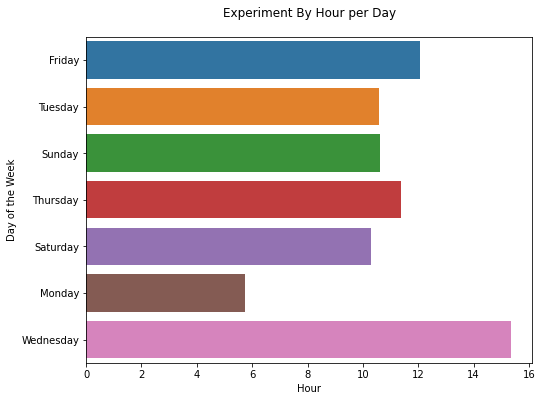

In [19]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['hour'], y=df['day of week'], ci=False)

plt.title('Experiment By Hour per Day', pad=20)
plt.xlabel('Hour')
plt.ylabel('Day of the Week');

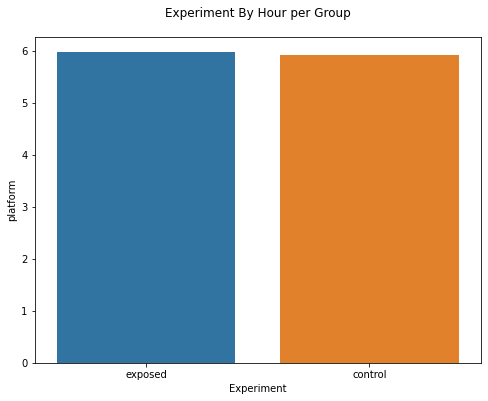

In [20]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['experiment'], y=df['platform_os'], ci=False)

plt.title('Experiment By Hour per Group', pad=20)
plt.xlabel('Experiment')
plt.ylabel('platform');

In [21]:
len(df['device_make'].unique().tolist())

270

In [22]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [23]:
df_yes = df[df['yes'] == 1]
df_yes = df_yes.drop('no', axis = 1)
df_yes = df_yes.rename(columns={"yes": "brand_awareness"})
df_yes

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,Wednesday
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,Friday
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,Thursday
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,Sunday
...,...,...,...,...,...,...,...,...,...
8031,fe42a3c3-3e1e-40c9-b029-6b0ee9702aaa,control,2020-07-10,1,Generic Smartphone,6,Chrome Mobile,1,Friday
8042,fee7da61-84fe-451b-95f4-ba2523fa987d,exposed,2020-07-09,14,Generic Smartphone,6,Chrome Mobile,1,Thursday
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,Friday
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,Sunday


In [24]:
df_no = df[df['no'] == 1]
df_no = df_no.drop('yes', axis = 1)

In [25]:
da = {1 : 0}
df_no = df_no.replace({'no':da})

In [26]:
df_no = df_no.rename(columns={"no": "brand_awareness"})
df_no

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,day of week
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,Sunday
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,Monday
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,Friday
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,Friday
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,Sunday
...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,Wednesday
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,Thursday
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,Thursday
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,Friday


In [27]:
df_clean = pd.concat([df_yes, df_no], axis = 0)

In [28]:
df_clean = df_clean.sample(frac=1).reset_index(drop=True)

In [29]:
ab_summary = df_clean.pivot_table(values='brand_awareness', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = df_clean.pivot_table(values='brand_awareness', index='experiment', aggfunc=lambda x: len(x))
ab_summary['rate'] = df_clean.pivot_table(values='brand_awareness', index='experiment')
ab_summary

,brand_awareness,total,rate
experiment,,,
control,264,586,0.450512
exposed,308,657,0.468798


There is a small difference between the two groups. The margins is approximately 0.02

In [30]:
control_aware = ab_summary.brand_awareness[0] #A_converted
control_total = ab_summary.total[0] #A_total

control_rate = ab_summary.rate[0]
exposed_rate = ab_summary.rate[1]

exposed_aware = ab_summary.brand_awareness[1] #B_converted
exposed_total = ab_summary.total[1] #B_total

Text(0, 0.5, 'probability')

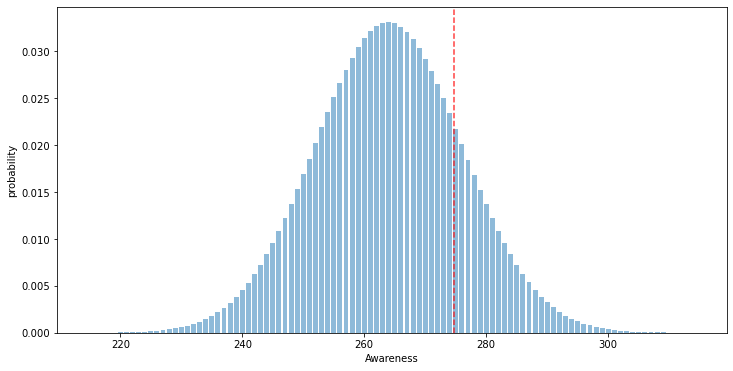

In [31]:

import scipy.stats as scs

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(control_aware-49, control_aware+50, 100)
y = scs.binom(control_total, control_rate).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=exposed_rate * control_total, c='red', alpha=0.75, linestyle='--')
plt.xlabel('Awareness')
plt.ylabel('probability')

The probability of getting control group is slightly higher

Text(0, 0.5, 'probability')

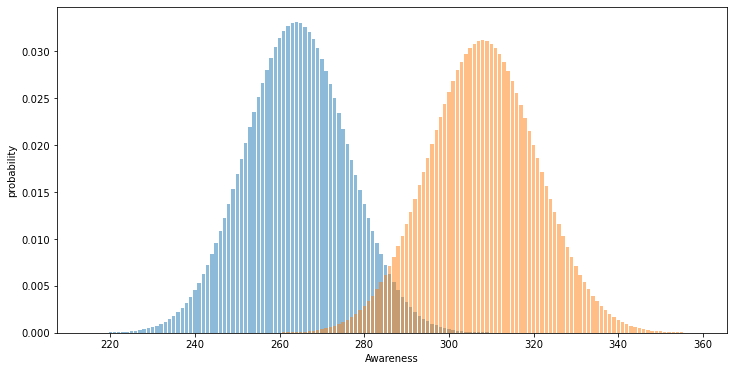

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(control_aware-49, control_aware+50, 100)
yA = scs.binom(control_total, control_rate).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(exposed_aware-49, exposed_aware+50, 100)
yB = scs.binom(exposed_total, exposed_rate).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('Awareness')
plt.ylabel('probability')

As far as the the awareness of the brand is concern, the two groups have almost the same rate. Nevertheless, the exposed group (orange) seem to be more aware of the brand than the control group.

In [33]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = df_clean[df_clean['experiment'] == 'control']['brand_awareness']
exposed_results = df_clean[df_clean['experiment'] == 'exposed']['brand_awareness']

In [34]:
n_con = control_results.count()
n_expo = exposed_results.count()
successes = [control_results.sum(), exposed_results.sum()]
nobs = [n_con, n_expo]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for exposed group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.65
p-value: 0.518
ci 95% for control group: [0.410, 0.491]
ci 95% for exposed group: [0.431, 0.507]


The p-value is 0.518, meaning that there is no difference in brand awareness between the exposed and control groups in the current case.

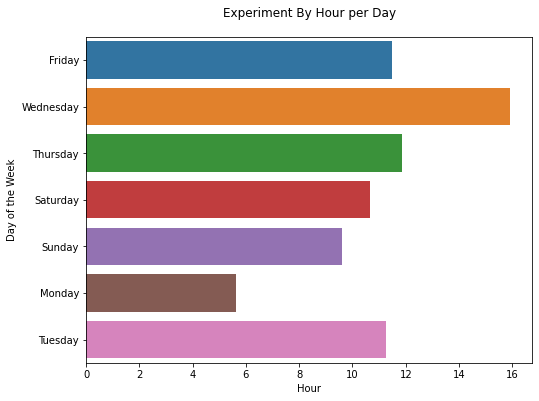

In [35]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_clean['hour'], y=df_clean['day of week'], ci=False)

plt.title('Experiment By Hour per Day', pad=20)
plt.xlabel('Hour')
plt.ylabel('Day of the Week');

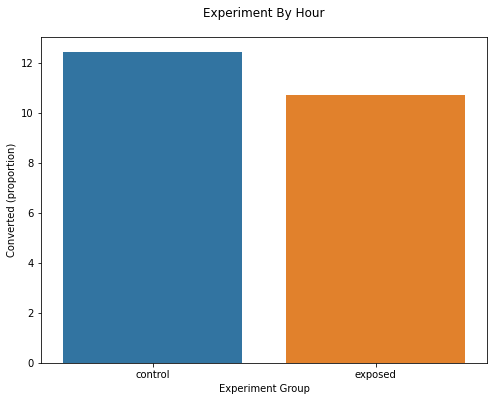

In [36]:
plt.figure(figsize=(8,6))

sns.barplot(x=df_clean['experiment'], y=df_clean['hour'], ci=False)

plt.title('Experiment By Hour', pad=20)
plt.xlabel('Experiment Group')
plt.ylabel('Converted (proportion)');

In [37]:
#sequential